In [1]:
import pandas as pd

In [2]:
data1=pd.read_csv("C:/Users/gaurisonawane/Downloads/EastWestAirlines.csv")

In [3]:
data1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
data1.shape

(3999, 12)

In [8]:
def norm_fun(i):
    x = (i-i.mean())/(i.max()-i.min())
    return (x)

In [10]:
df = norm_fun(data1.iloc[:,1:])

In [11]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.026664,-0.012927,-0.264879,-0.007252,-0.003063,-0.064360,-0.123278,-0.014929,-0.025917,0.347413,-0.370343
1,-0.031884,-0.012927,-0.264879,-0.007252,-0.003063,-0.064205,-0.111650,-0.014929,-0.025917,0.343554,-0.370343
2,-0.018915,-0.012927,-0.264879,-0.007252,-0.003063,-0.049384,-0.088394,-0.014929,-0.025917,0.351512,-0.370343
3,-0.034505,-0.012927,-0.264879,-0.007252,-0.003063,-0.063124,-0.123278,-0.014929,-0.025917,0.341625,-0.370343
4,0.014166,-0.012927,0.485121,-0.007252,-0.003063,0.099191,0.167420,0.052469,0.049555,0.339576,0.629657


In [12]:
#K-Means Clustering
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters = 5)
model.fit(df)

KMeans(n_clusters=5)

In [14]:
model.labels_

array([2, 2, 2, ..., 3, 4, 4])

In [16]:
md = pd.Series(model.labels_)
data1['clust'] = md

In [18]:
data1.iloc[:,1:5].groupby(data1.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles
clust,,,,
0,118297.325243,73.467638,3.584142,1.001618
1,83529.153046,290.453195,1.156018,1.032689
2,49921.633641,89.903226,1.122120,1.019585
3,108317.387376,198.336634,3.915842,1.001238
4,33097.301357,94.131783,1.070736,1.016473


In [19]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

In [20]:
z = linkage(df, method = "complete", metric = "euclidean")

In [21]:
import matplotlib.pyplot as plt

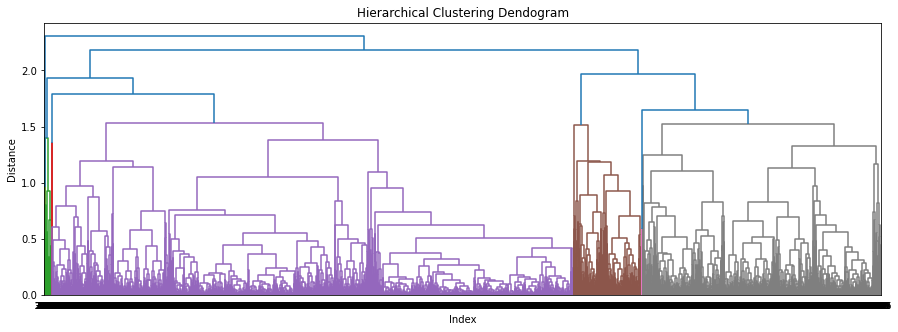

In [22]:
plt.figure(figsize = (15,5));
plt.title('Hierarchical Clustering Dendogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0., leaf_font_size = 8.)
plt.show()


In [23]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [24]:
array = df.values

In [25]:
array

array([[-2.66643092e-02, -1.29273886e-02, -2.64878720e-01, ...,
        -2.59168566e-02,  3.47412661e-01, -3.70342586e-01],
       [-3.18841600e-02, -1.29273886e-02, -2.64878720e-01, ...,
        -2.59168566e-02,  3.43554450e-01, -3.70342586e-01],
       [-1.89151858e-02, -1.29273886e-02, -2.64878720e-01, ...,
        -2.59168566e-02,  3.51512010e-01, -3.70342586e-01],
       ...,
       [-2.53841239e-06, -1.29273886e-02,  2.35121280e-01, ...,
        -2.59168566e-02, -3.27533083e-01,  6.29657414e-01],
       [-1.09701494e-02, -1.29273886e-02, -2.64878720e-01, ...,
        -7.04893204e-03, -3.27653652e-01, -3.70342586e-01],
       [-4.14029530e-02, -1.29273886e-02, -2.64878720e-01, ...,
        -2.59168566e-02, -3.28015359e-01, -3.70342586e-01]])

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
std_scaler = StandardScaler().fit(array)
X = std_scaler.transform(array)

In [28]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [29]:
dbscan = DBSCAN(eps = 0.8, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.8)

In [30]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
cl = pd.DataFrame(dbscan.labels_, columns = ['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [32]:
pd.concat([df, cl], axis = 1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.026664,-0.012927,-0.264879,-0.007252,-0.003063,-0.064360,-0.123278,-0.014929,-0.025917,0.347413,-0.370343,0
1,-0.031884,-0.012927,-0.264879,-0.007252,-0.003063,-0.064205,-0.111650,-0.014929,-0.025917,0.343554,-0.370343,0
2,-0.018915,-0.012927,-0.264879,-0.007252,-0.003063,-0.049384,-0.088394,-0.014929,-0.025917,0.351512,-0.370343,0
3,-0.034505,-0.012927,-0.264879,-0.007252,-0.003063,-0.063124,-0.123278,-0.014929,-0.025917,0.341625,-0.370343,0
4,0.014166,-0.012927,0.485121,-0.007252,-0.003063,0.099191,0.167420,0.052469,0.049555,0.339576,0.629657,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.032335,-0.012927,-0.264879,-0.007252,-0.003063,-0.032690,-0.088394,-0.008439,-0.007049,-0.327413,0.629657,1
3995,-0.005406,-0.012927,-0.264879,-0.007252,-0.003063,-0.061300,-0.076766,-0.014929,-0.025917,-0.328377,0.629657,1
3996,-0.000003,-0.012927,0.235121,-0.007252,-0.003063,0.031485,-0.041883,-0.014929,-0.025917,-0.327533,0.629657,1
3997,-0.010970,-0.012927,-0.264879,-0.007252,-0.003063,-0.063124,-0.123278,0.001296,-0.007049,-0.327654,-0.370343,0
